<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Headline_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████| 300/300 [00:02<00:00, 146.07it/s]



🧾 BoW + KNN – Classification Report:
              precision    recall  f1-score   support

    Politics       1.00      1.00      1.00        25
      Sports       1.00      1.00      1.00        25
        Tech       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



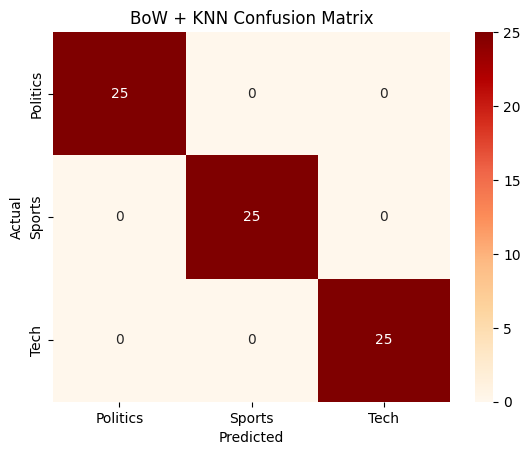


🧾 TF-IDF + KNN – Classification Report:
              precision    recall  f1-score   support

    Politics       1.00      1.00      1.00        25
      Sports       1.00      1.00      1.00        25
        Tech       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



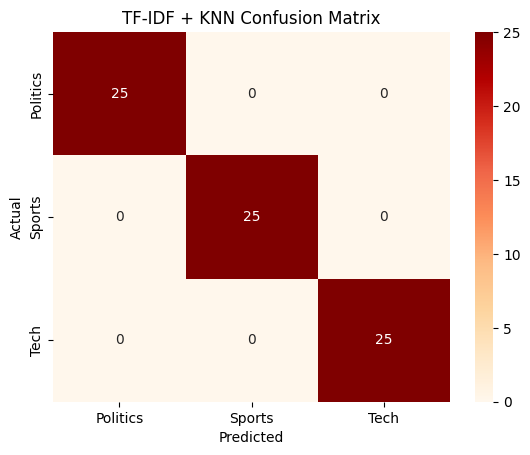


🧾 Embeddings + KNN – Classification Report:
              precision    recall  f1-score   support

    Politics       1.00      1.00      1.00        25
      Sports       1.00      1.00      1.00        25
        Tech       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



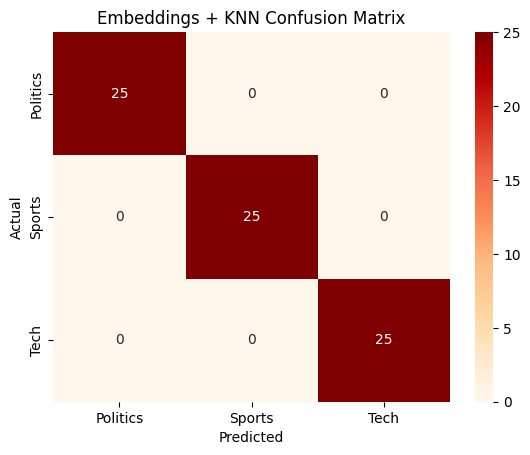

In [3]:
# 📰 News Headline Classification with BoW, TF-IDF, and Embeddings
import pandas as pd, numpy as np, random, spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 Load spaCy model with 300-dim embeddings
nlp = spacy.load("en_core_web_md")

# 🧼 Custom spaCy tokenizer
def spacy_tokenizer(text):
    doc = nlp(text)
    return [tok.lemma_.lower().strip() for tok in doc if not tok.is_stop and not tok.is_punct]

# 🧾 Generate synthetic news headlines for 3 categories
politics = [
    "Senate passes new healthcare reform bill.",
    "The president addresses the nation tonight.",
    "Elections to be held in November.",
    "New immigration policy sparks debate.",
    "Government shutdown avoided after late vote."
]
sports = [
    "Team wins championship in dramatic fashion.",
    "Star quarterback signs record-breaking deal.",
    "Olympics postponed due to global concerns.",
    "Local team advances to finals.",
    "Player suspended for violating league policy."
]
tech = [
    "New smartphone model features AI integration.",
    "Breakthrough in quantum computing announced.",
    "Cyberattack hits major tech companies.",
    "Startup raises $50M for electric car tech.",
    "Social media app rolls out privacy update."
]

data = {"message": [], "label": []}
for _ in range(100):
    data["message"].append(random.choice(politics))
    data["label"].append(0)  # Politics
    data["message"].append(random.choice(sports))
    data["label"].append(1)  # Sports
    data["message"].append(random.choice(tech))
    data["label"].append(2)  # Tech

df_news = pd.DataFrame(data)

# 🔠 Vectorization
bow_vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
X_bow = bow_vectorizer.fit_transform(df_news["message"])
X_tfidf = tfidf_vectorizer.fit_transform(df_news["message"])
X_embed = np.array([nlp(text).vector for text in tqdm(df_news["message"])])

# 🧪 Evaluation
def evaluate_knn_news(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🧾 {title} – Classification Report:")
    print(classification_report(y_test, preds, target_names=["Politics", "Sports", "Tech"]))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', xticklabels=["Politics", "Sports", "Tech"], yticklabels=["Politics", "Sports", "Tech"])
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📊 Run for all 3 vectorizations
evaluate_knn_news(X_bow, df_news["label"], "BoW + KNN")
evaluate_knn_news(X_tfidf, df_news["label"], "TF-IDF + KNN")
evaluate_knn_news(X_embed, df_news["label"], "Embeddings + KNN")
